# Telco™ Project

- Garrett Arnett

Goals:

    Find drivers of customer churn
    Accurately predict customer churn at Telco™


To Do:

    Find 2 or more drivers of churn using statistical tests
    Establish baseline accuracy
    Outperform baseline accuracy using a classification model
    Document insights from each stage of the data science pipeline

Findings:

   - In the search for significant factors of chrun within the Telco dataset, I found that fiber optic customers are churing at higher rates than any other internet service within the company.

   - Through careful analysis I found that these customers make up roughly 44% of all customers within Telco. This needs to be addressed.

   - Also I found that the mjaority of customers do not have online security in their Telco plan. While looking deeper I found that customers without internet security seem to chrun at higher rates.

# Imports

In [1]:
import wrangle
import explore
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from pandas import DataFrame
from acquire import acquire_telco_data
from prepare import train_validate_test_split
from prepare import prep_telco_data
from prepare import data_target_split
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.impute import SimpleImputer

plot_confusion_matrix


<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True)>

# Acquire

- Create a fucntion that will acquire telco.csv
- Take a look at its values (info, describe, and head)
- Plot some histograms showing the distributions of variables of intrest

In [2]:
# time to acquire our data
df = acquire_telco_data

In [3]:
df = acquire_telco_data(df)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Shape (rows x columns)

In [5]:
df.shape

(7043, 21)

### Values

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploring our Data


Text(0.5, 0, 'Internet Type')

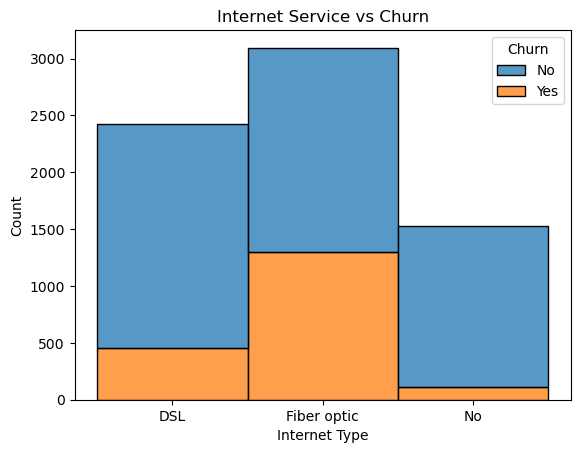

In [8]:
# Internet Service and Churn
sns.histplot(data=df,
            x=df.InternetService,
            hue=df.Churn,
            multiple='stack')

plt.title("Internet Service vs Churn")
plt.xlabel('Internet Type')

### Taking a look at Internet Service vs Churn. It looks like there is a significant difference in chrurn with customers with fiber optic internet.

Text(0.5, 0, 'Online Security')

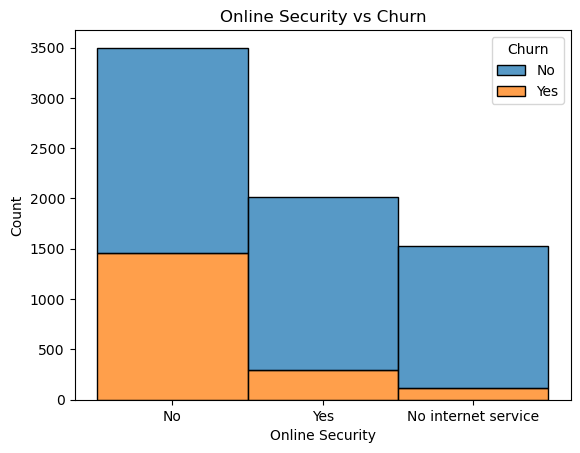

In [9]:
# Online Security and Churn
sns.histplot(data=df,
            x=df.OnlineSecurity,
            hue=df.Churn,
            multiple='stack')

plt.title("Online Security vs Churn")
plt.xlabel('Online Security')

###  Taking a look at OnlineSecurity vs Churn. It looks like there is a significant difference in chrurn with customers with fiber optic internet.

# Prepare

- Removed columns that did not contain useful information
- Renamed columns to promote readability
- Checked for nulls in the data (there were none)
- Checked that column data types were appropriate
- Encoded categorical variables

In [10]:
df = prep_telco_data(df)

In [11]:
df.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,53.85,108.15,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


# Summary of out data

In [12]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges,internet_service_Fiber optic,internet_service_No,gender_Male,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,...,device_protection_No internet service,device_protection_Yes,Churn_Yes,tech_support_No internet service,tech_support_Yes,streaming_movies_No internet service,streaming_movies_Yes,streaming_tv_No internet service,streaming_tv_Yes,paperless_billing_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.439585,0.216669,0.504756,0.216101,0.335794,0.228880,...,0.216669,0.343888,0.265370,0.216669,0.290217,0.216669,0.387903,0.216669,0.384353,0.592219
std,0.368612,24.559481,30.090047,2265.000258,0.496372,0.412004,0.500013,0.411613,0.472301,0.420141,...,0.412004,0.475038,0.441561,0.412004,0.453895,0.412004,0.487307,0.412004,0.486477,0.491457
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training, Testing, Splitting

- Split data into train, validate and test (approx. 56/24/20), stratifying on 'upset'


In [13]:
# Creating Train, test, split
train, validate, test = train_validate_test_split(df, target = 'Churn_Yes', seed=1349)
train = train.drop(columns='customer_id')
validate = validate.drop(columns='customer_id')
test = test.drop(columns='customer_id')
X_train, y_train = data_target_split(train)
# For my x, I want to drop columns that are 'Churn_Yes'
X_train = train.drop(columns=['Churn_Yes'])
y_train = train.Churn_Yes

X_validate = validate.drop(columns=['Churn_Yes'])
y_validate = validate.Churn_Yes

X_test = test.drop(columns=['Churn_Yes'])
y_test = test.Churn_Yes
df.Churn_Yes.value_counts() # (We will use 'No')

# setting my alpha
confidence_interval = 0.95
alpha = 1 - confidence_interval


# Data Dictionary

| Term | Definition |
| --- | --- |
| KNN | K-nearest Neighbors Test |
| LogReg | Lgistic Regression Test |
| Rforest | Random Forest Test |
| Forest | Decision Tree Test |

# Hypothesis Testing

### - Are customers more likely to churn with fiber optic internet service?


#### H$_0$: There is no diffrence in churn between customers with fiber optice internet services and those whithout.

#### H$_a$: There is a significant diffrence in churn between the customers that have fiber optic.

In [14]:
fiberoptic = np.where((X_train['internet_service_Fiber optic']==1) & (X_train.internet_service_No==0), 1, 0)

In [15]:
outcomes_1 = pd.crosstab(fiberoptic, train.Churn_Yes)
outcomes_1 = outcomes_1.rename(index={0:'No_fiber_optic', 1: 'Fiber_optic'}, columns={0:'No_Churn', 1:'Churn'})

In [16]:
outcomes_1

Churn_Yes,No_Churn,Churn
row_0,,
No_fiber_optic,1893,308
Fiber_optic,1004,738


In [17]:
train['internet_service_Fiber optic'].value_counts()

0    2201
1    1742
Name: internet_service_Fiber optic, dtype: int64

In [18]:
chi2, p, degf, expected = stats.chi2_contingency(outcomes_1)

print(("Chi2: {:.2f}" 
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO that states there is no diffrence in churn between the customers that have fiber optic.')
else:
    print('Fail to reject HO. There is no diffrence in churn between customers with fiber optice internet services and those whithout.')

Chi2: 400.13
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO that states there is no diffrence in churn between the customers that have fiber optic.


 - There is a significant diffrence in churn between the customers that have fiber optic.')


### - Are customers that have no online security and fiber optic and have more likly to churn?

#### H$_0$: There is no diffrence in churn dependening on if the customer has online security and has fiber optic.
    
#### H$_a$: There is a significant diffrence in churn dependening on if the customer has online security and has fiber optic.

In [19]:
fiber_security = np.where((X_train['online_security_Yes']==0) & (X_train['internet_service_Fiber optic']==1), 1, 0)

In [20]:
outcomes_2 = pd.crosstab(fiber_security, train.Churn_Yes)
outcomes_2 = outcomes_2.rename(index={0:'fiber_no_security', 1: 'fiber_and_security'}, columns={0:'No_Churn', 1:'Churn'})

In [21]:
outcomes_2

Churn_Yes,No_Churn,Churn
row_0,,
fiber_no_security,2257,413
fiber_and_security,640,633


In [22]:
train['internet_service_Fiber optic'].value_counts()

0    2201
1    1742
Name: internet_service_Fiber optic, dtype: int64

In [23]:
train['online_security_Yes'].value_counts()

0    2795
1    1148
Name: online_security_Yes, dtype: int64

In [24]:
chi2, p, degf, expected = stats.chi2_contingency(outcomes_2)

print(("Chi2: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))

if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO (for Ha)that states there is no significant diffrence in churn dependening on if the customer has online security and has fiber optic.')
else:
    print('Fail to reject HO. There is no significant diffrence in churn dependening on if the customer has online security and has fiber optic.')

Chi2: 517.26
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO (for Ha)that states there is no significant diffrence in churn dependening on if the customer has online security and has fiber optic.


- There is a significant diffrence in churn dependening on if the customer has online security and has fiber optic.

# Modeling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# creating our baseline accuracy
baseline_accuracy = (train.Churn_Yes== 0).mean()
round(baseline_accuracy, 3)

0.735

In [27]:
# creating our split data
X_validate, y_validate = data_target_split(validate)
X_test, y_test = data_target_split(test)

### Logistic Regression

In [28]:
import warnings
warnings.filterwarnings('ignore')

# Creating our Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
logreg_train_accuracy = logreg.score(X_train, y_train)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

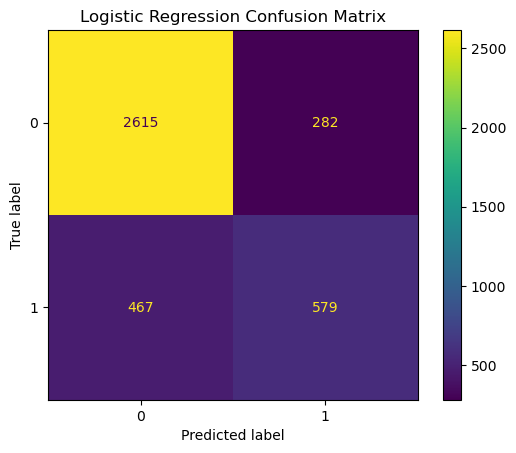

In [29]:
plot_confusion_matrix(logreg, X_train, y_train)
plt.title("Logistic Regression Confusion Matrix")

### Decision Tree

In [30]:
# Creating our Decision Tree Model
forest = DecisionTreeClassifier().fit(X_train, y_train)
forest_train_accuracy = forest.score(X_train, y_train)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

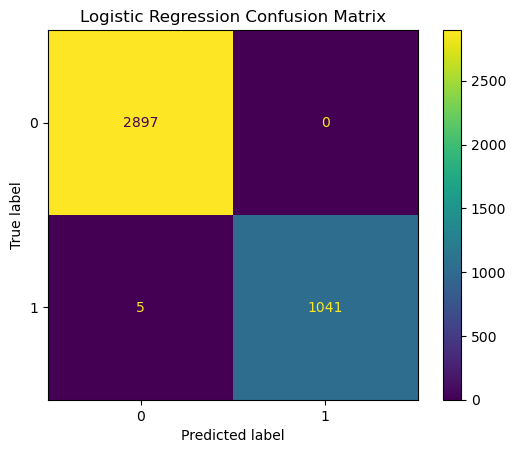

In [31]:
plot_confusion_matrix(forest, X_train, y_train)
plt.title("Logistic Regression Confusion Matrix")

### Random Forest

In [32]:
# Creating our Random Forest Model
rforest = RandomForestClassifier().fit(X_train, y_train)
r_forest_train_accuracy = rforest.score(X_train, y_train)


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

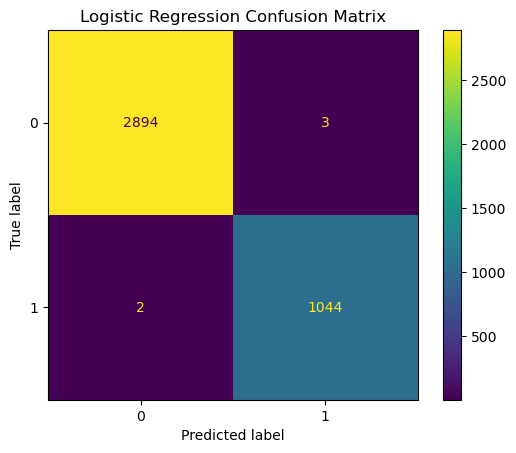

In [33]:
plot_confusion_matrix(rforest, X_train, y_train)
plt.title("Logistic Regression Confusion Matrix")

### K Nearest Neighbors

In [34]:
# Creating our KNN Model
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_train_accuracy = knn.score(X_train, y_train)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

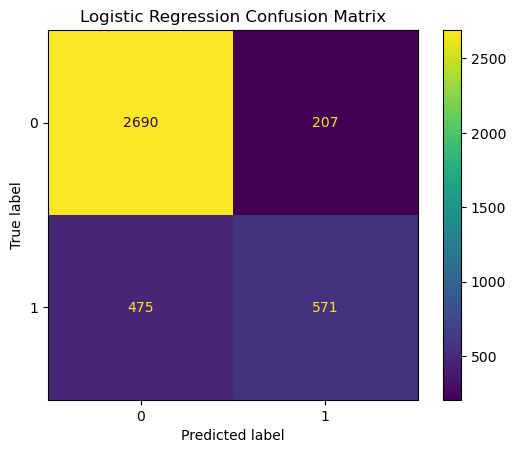

In [35]:
plot_confusion_matrix(knn, X_train, y_train)
plt.title("Logistic Regression Confusion Matrix")

# Results

### Train

In [36]:
print(f"Baseline Accuracy --- {baseline_accuracy:.2%}")
print("")
print(f"Logistic Regression Accuracy --- {logreg_train_accuracy:.2%}")
print(f"Decision Tree Accuracy --- {forest_train_accuracy:.2%}")
print(f"Random Forest Accuracy --- {r_forest_train_accuracy:.2%}")
print(f"KNN Accuracy Accuracy --- {knn_train_accuracy:.2%}")

Baseline Accuracy --- 73.47%

Logistic Regression Accuracy --- 81.00%
Decision Tree Accuracy --- 99.87%
Random Forest Accuracy --- 99.87%
KNN Accuracy Accuracy --- 82.70%


#### Under our train dataset, our Decision Tree and Random Forest produced the best accuracy, but may be overfit. 

### Validate

In [37]:
logreg_validate_accuracy = logreg.score(X_validate, y_validate)
forest_validate_accuracy = forest.score(X_validate, y_validate)
r_forest_validate_accuracy = rforest.score(X_validate, y_validate)
knn_validate_accuracy = knn.score(X_validate, y_validate)

print(f"Logistic Regression Accuracy --- {logreg_validate_accuracy:.2%}")
print(f"Decision Tree Accuracy --- {forest_validate_accuracy:.2%}")
print(f"Random Forest Accuracy --- {r_forest_validate_accuracy:.2%}")
print(f"KNN Accuracy Accuracy --- {knn_validate_accuracy:.2%}")

Logistic Regression Accuracy --- 80.07%
Decision Tree Accuracy --- 73.68%
Random Forest Accuracy --- 79.78%
KNN Accuracy Accuracy --- 76.58%


#### When running our models on our Valitate dataset, we know that Decision Tree and Random forest were overfit. Our Logistic Regression Accuracy is our best model moving forward. 

### Test

In [38]:
logreg_test_accuracy = logreg.score(X_test, y_test)
print(f"Logistic Regression Accuracy --- {logreg_test_accuracy:.2%}")

Logistic Regression Accuracy --- 79.84%


#### On our Test dataset, our Logistic Regression Accuracy was 79.70%. Which is still above out Baseline Accuracy of 73.47. 

# Predicting Customer Churn

In [39]:
train, validate, test = train_validate_test_split(df, target = 'Churn_Yes', seed=123)

In [40]:
df_telco = pd.concat([train, validate, test], axis=0)

In [41]:
customer_ids = df_telco['customer_id']
df_telco_data = df_telco.drop(columns=['customer_id', 'Churn_Yes'])
df_telco_target = df_telco.Churn_Yes

In [42]:
telco_accuracy = logreg.score(df_telco_data, df_telco_target)
print(f"Logistic Regression Accuracy on Telco Data --- {telco_accuracy:.2%}")

Logistic Regression Accuracy on Telco Data --- 80.55%


#### Using our Logistic Regression Accuracy on our entire Telco database, our accuracy comes back at 80.45%

### Modeling Summary

- The Decision Tree and Random Forest models performed slightly better on train data but was worse on validate data. They were overfit.

- A Logistic Regression model selected as the final model and had an accuracy of about 80% which is 13% better than the baseline accuracy.

### Turn into csv

In [43]:
# Turning our Predictions into a csv
prediction_of_churn = pd.DataFrame({'churn_prediction' : logreg.predict(df_telco_data)})
churn_probability = pd.DataFrame({'churn_probability': logreg.predict_proba(df_telco_data)[:,1]})
data = [customer_ids, churn_probability, prediction_of_churn]
customer_churn = pd.concat(data, axis=1)
customer_churn.to_csv(r'Customer_Churn.csv', index = False)


# Conclusion

### Summary:

- I found that there was some significant churn associated with the first six months of acquiring Telco services.

- There is significant proof that a good portion of Telco's chrun is coming from the fiber optic customers. We also know that indivudals with fiber optic and no internet security are churning at higher rates.

- With our Logestic Regression Model, we were able to validate at an accuracy of 80.37% while the baseline accuracy is 73.45%. This model is fit well compared to the other models.

### Recomendation: 

- In order to address the churn of fiber optic customers that have no security, I would propose a bundle deal that provideds security along with the fiber optic services. Infering from the data, I can estimate that fiber optic customers are churning because they do not want to pay for extra security and/or are not aware of the service.

### Next Steps

- I would take a look into tenure of the customers and indetify within the first six months what type of customers are chruning. I would have also liked to make more features from the data which could help boost my accuracy when fiting the data to models.